In [1]:
# Import scikit-plot
import scikitplot.snsx as sp

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)  # reproducibility
import pandas as pd

from sklearn.datasets import (
    load_breast_cancer as data_2_classes,
    # load_iris as data_3_classes,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
# X, y = data_3_classes(return_X_y=True, as_frame=False)
X, y = data_2_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)
np.unique(y)

array([0, 1])

In [4]:
# Create an instance of the LogisticRegression
model = (
    LogisticRegression(max_iter=int(1e5), random_state=0)
    .fit(X_train, y_train)
)
# Perform predictions
y_val_prob = model.predict_proba(X_val)
# Create a DataFrame with predictions
df = pd.DataFrame({
    "y_true": y_val==1,  # target class (0,1,2)
    "y_score": y_val_prob[:, 1],  # target class (0,1,2)
    # "y_true": np.random.normal(0.5, 0.1, 100).round(),
    # "y_score": np.random.normal(0.5, 0.15, 100),
    # "hue": np.random.normal(0.5, 0.4, 100).round(),
})

In [5]:
p = sp.decileplot(
    df,
    x="y_true",
    y="y_score",
    kind="df",
    n_deciles=10,
    round_digits=4,
    verbose=True,
)
p
# p.columns.tolist()
# p[["decile", "cnt_resp", "cnt_resp_wiz", "cum_resp_pct", "cum_resp_wiz_pct"]]
p.iloc[:, range(9, 23)]
# p.iloc[:, [11, 12, 12, 14]]

{
  "decile": "Meaning: Ranked group (1 = highest predicted probability). Critical: Ensure sorted descending by model score. Fatal if top deciles don't capture positives.Formula: rank by model score into k quantiles (e.g., 10 deciles). ",
  "prob_min": "Meaning: Lowest predicted probability in the decile. Critical: Signals model calibration. Fatal if too close to prob_max (poor ranking).Formula: min(score in decile). ",
  "prob_max": "Meaning: Highest predicted probability in the decile. Critical: Checks separation. Fatal if overlaps lower deciles (poor discrimination).Formula: max(score in decile). ",
  "prob_avg": "Meaning: Average predicted probability in the decile. Critical: Useful for calibration curves; should decrease monotonically across deciles.Formula: mean(score in decile). ",
  "cnt_resp_total": "Meaning: Total samples in the decile. Critical: Denominator for rate_resp and cumulative % calculations. Fatal if deciles uneven.Formula: count(samples in decile). ",
  "cnt_resp"

,rate_resp,cum_resp_total,cum_resp_total_pct,cum_resp,cum_resp_pct,cum_resp_non,cum_resp_non_pct,cum_resp_rndm,cum_resp_rndm_pct,cum_resp_wiz,cum_resp_wiz_pct,KS,cumulative_lift,decile_wise_lift
0,100.0000,29.0,10.1754,29.0,15.7609,0.0,0.0000,18.4,10.0,29,15.7609,15.7609,1.5489,1.5761
1,100.0000,57.0,20.0000,57.0,30.9783,0.0,0.0000,36.8,20.0,57,30.9783,30.9783,1.5489,1.5217
2,100.0000,86.0,30.1754,86.0,46.7391,0.0,0.0000,55.2,30.0,86,46.7391,46.7391,1.5489,1.5761
3,100.0000,114.0,40.0000,114.0,61.9565,0.0,0.0000,73.6,40.0,114,61.9565,61.9565,1.5489,1.5217
4,100.0000,143.0,50.1754,143.0,77.7174,0.0,0.0000,92.0,50.0,143,77.7174,77.7174,1.5489,1.5761
5,89.2857,171.0,60.0000,168.0,91.3043,3.0,2.9703,110.4,60.0,171,92.9348,88.3341,1.5217,1.3587
6,55.1724,200.0,70.1754,184.0,100.0000,16.0,15.8416,128.8,70.0,184,100.0000,84.1584,1.4250,0.8696
7,0.0000,228.0,80.0000,184.0,100.0000,44.0,43.5644,147.2,80.0,184,100.0000,56.4356,1.2500,0.0000
8,0.0000,257.0,90.1754,184.0,100.0000,73.0,72.2772,165.6,90.0,184,100.0000,27.7228,1.1089,0.0000
9,0.0000,285.0,100.0000,184.0,100.0000,101.0,100.0000,184.0,100.0,184,100.0000,0.0000,1.0000,0.0000


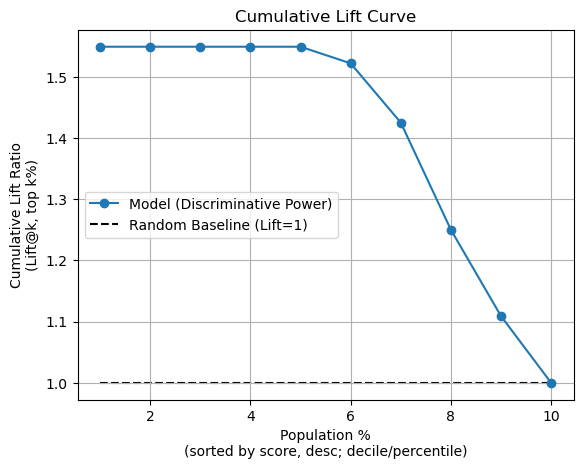

In [6]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_lift", n_deciles=10)

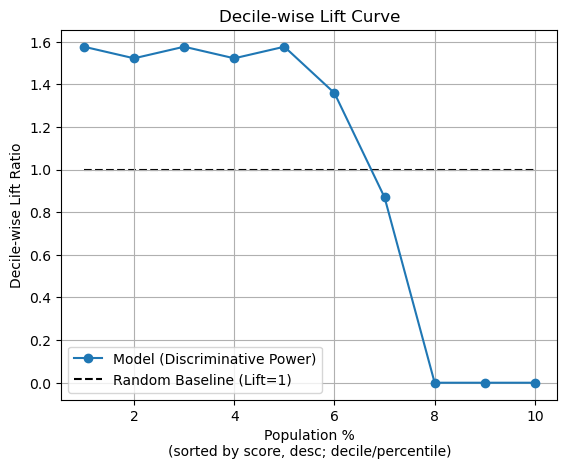

In [7]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="decile_wise_lift", n_deciles=10)

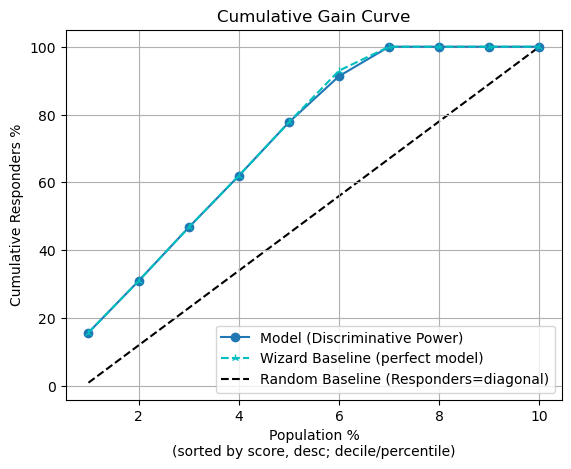

In [8]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_gain", n_deciles=10)

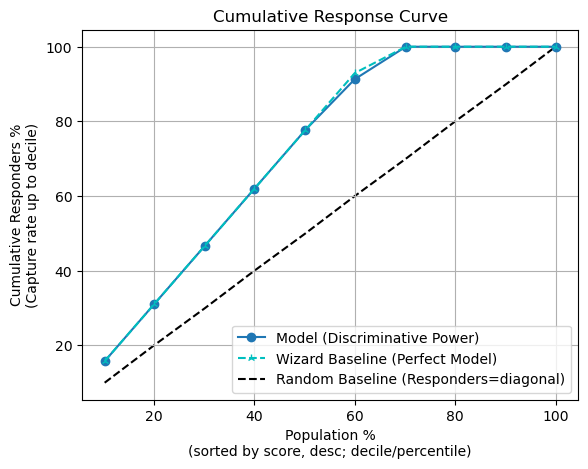

In [9]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="cumulative_response", n_deciles=10)

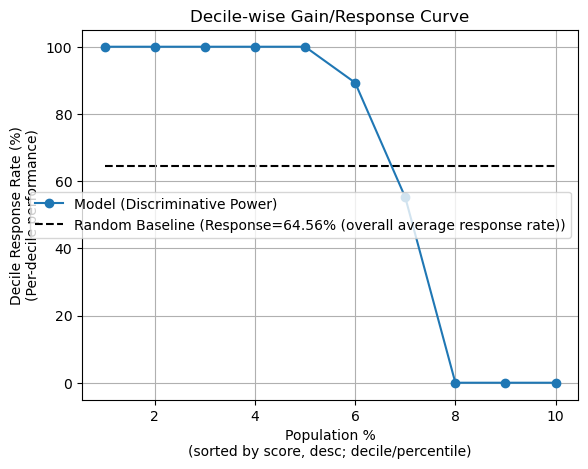

In [10]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="decile_wise_gain", n_deciles=10)

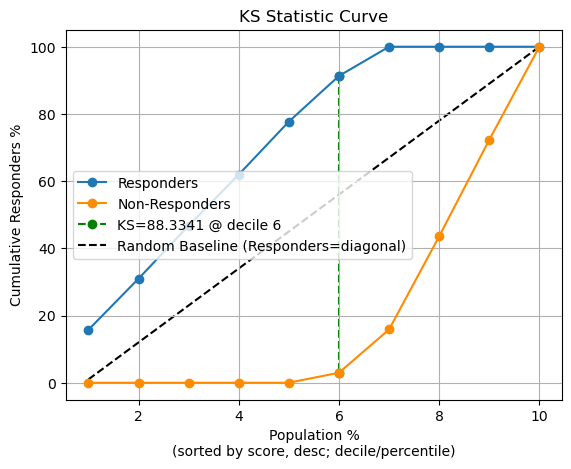

In [11]:
p = sp.decileplot(df, x="y_true", y="y_score", kind="ks_statistic", n_deciles=10)

{
  "decile": "Meaning: Ranked group (1 = highest predicted probability). Critical: Ensure sorted descending by model score. Fatal if top deciles don't capture positives.Formula: rank by model score into k quantiles (e.g., 10 deciles). ",
  "prob_min": "Meaning: Lowest predicted probability in the decile. Critical: Signals model calibration. Fatal if too close to prob_max (poor ranking).Formula: min(score in decile). ",
  "prob_max": "Meaning: Highest predicted probability in the decile. Critical: Checks separation. Fatal if overlaps lower deciles (poor discrimination).Formula: max(score in decile). ",
  "prob_avg": "Meaning: Average predicted probability in the decile. Critical: Useful for calibration curves; should decrease monotonically across deciles.Formula: mean(score in decile). ",
  "cnt_resp_total": "Meaning: Total samples in the decile. Critical: Denominator for rate_resp and cumulative % calculations. Fatal if deciles uneven.Formula: count(samples in decile). ",
  "cnt_resp"

,decile,prob_min,prob_max,prob_avg,cnt_resp_total,cnt_resp,cnt_resp_non,cnt_resp_rndm,cnt_resp_wiz,rate_resp,...,cum_resp_pct,cum_resp_non,cum_resp_non_pct,cum_resp_rndm,cum_resp_rndm_pct,cum_resp_wiz,cum_resp_wiz_pct,KS,cumulative_lift,decile_wise_lift
0,1,0.999885,0.999998,0.999948,29.0,29.0,0.0,18.4,29,100.000000,...,15.760870,0.0,0.000000,18.4,10.0,29,15.760870,15.760870,1.548913,1.576087
1,2,0.999344,0.999880,0.999661,28.0,28.0,0.0,18.4,28,100.000000,...,30.978261,0.0,0.000000,36.8,20.0,57,30.978261,30.978261,1.548913,1.521739
2,3,0.997519,0.999335,0.998695,29.0,29.0,0.0,18.4,29,100.000000,...,46.739130,0.0,0.000000,55.2,30.0,86,46.739130,46.739130,1.548913,1.576087
3,4,0.992537,0.997395,0.995925,28.0,28.0,0.0,18.4,28,100.000000,...,61.956522,0.0,0.000000,73.6,40.0,114,61.956522,61.956522,1.548913,1.521739
4,5,0.957771,0.992279,0.979970,29.0,29.0,0.0,18.4,29,100.000000,...,77.717391,0.0,0.000000,92.0,50.0,143,77.717391,77.717391,1.548913,1.576087
5,6,0.775711,0.955006,0.887510,28.0,25.0,3.0,18.4,28,89.285714,...,91.304348,3.0,2.970297,110.4,60.0,171,92.934783,88.334051,1.521739,1.358696
6,7,0.066257,0.770733,0.347654,29.0,16.0,13.0,18.4,13,55.172414,...,100.000000,16.0,15.841584,128.8,70.0,184,100.000000,84.158416,1.425000,0.869565
7,8,0.000370,0.048536,0.011200,28.0,0.0,28.0,18.4,0,0.000000,...,100.000000,44.0,43.564356,147.2,80.0,184,100.000000,56.435644,1.250000,0.000000
8,9,0.000001,0.000356,0.000058,29.0,0.0,29.0,18.4,0,0.000000,...,100.000000,73.0,72.277228,165.6,90.0,184,100.000000,27.722772,1.108949,0.000000
9,10,0.000000,0.000001,0.000000,28.0,0.0,28.0,18.4,0,0.000000,...,100.000000,101.0,100.000000,184.0,100.0,184,100.000000,0.000000,1.000000,0.000000


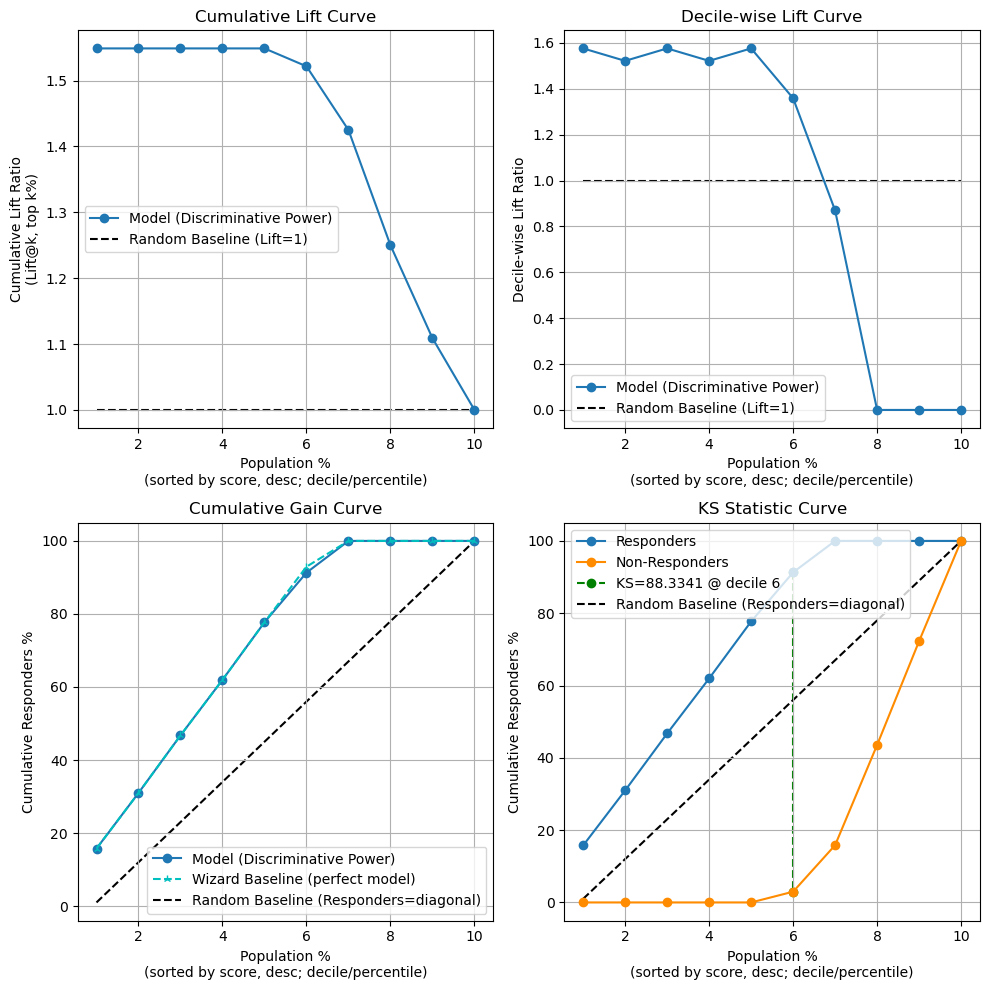

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
p = sp.decileplot(
    df,
    x="y_true",
    y="y_score",
    kind="report",
    n_deciles=10,
    round_digits=6,
    verbose=True,
)